# Introduction

In this notebook we analyse the impact of upgrading our model from a dqn to a double-dqn model - where we disentangle  the choice of action and value of the function of that action in the learning process.


This is part of the first project: *Navigation* of **Deep Reinforcement Learning for Enterprise** Course in *Udacity*.

Success in the environment is defined as achieving an average above 13 points over 100 consecutive episodes.

## 0 - Importing Packages

Importing all required packages.

In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from training_double_dqn_agent import double_dqn

## 1 - Initialising Environment

Initialising Unity environment to analyse.

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2 - Definiting Hyperparameters

Defining a dictionary with all hyperparameters used as inputs in the learning model.

In [8]:
dic_double_dqn = {'n_episodes': 2000,  #maximum number of episodes to learn from
                   'max_t': 1000,       #maximum time steps per episode
                   'eps_start': 0.5,    #initial epsilon value 
                   'eps_end': 0.01,     #final epsilon value
                   'eps_decay': 0.92,   #decay rate for epsilon per episode
                   'fc1_units':32,      #number of units for the first deep fully connected network layer
                   'fc2_units':64,      #number of units for the second deep fully connected network layer
                   'buffer_size': int(2e4), #size of the memory
                   'batch_size': 64,     #size of the number of examples fed at each learning step
                   'gamma':0.99,         #discounting rate of rewards
                   'tau': 1e-3,          #rate of soft update between target and local network model
                   'lr': 1e-4,           #learning rate for the network parameters
                   'update_every': 3     #how often between action steps trigger learn step
                  }

Base hyperparameters:

* 'n_episodes': 2000 -- maximum number of episodes to learn from
* 'max_t': 1000 -- maximum time steps per episode
* 'eps_start': 1.0 -- initial epsilon value 
* 'eps_end': 0.01 -- final epsilon value
* 'eps_decay':0.995 -- decay rate for epsilon per episode
* 'fc1_units':64 -- number of units for the first deep fully connected network layer
* 'fc2_units':64 -- number of units for the second deep fully connected network layer
* 'buffer_size': int(1e5) -- size of the memory
* 'batch_size': 64 -- size of the number of examples fed at each learning step
* 'gamma':0.99 -- discounting rate of rewards
* 'tau': 1e-3 -- rate of soft update between target and local network model
* 'lr': 1e-4 -- learning rate for the network parameters
* 'update_every': 4 -- how often between action steps trigger learn step


Using the DQN tuned hyperparameters:
* 'n_episodes': 2000,
* 'max_t': 1000,
* 'eps_start': 0.5,
* 'eps_end': 0.01,
* 'eps_decay':0.92,
* 'fc1_units':32,
* 'fc2_units':64,
* 'buffer_size': int(2e4),
* 'batch_size': 64,
* 'gamma':0.99,
* 'tau': 1e-3,
* 'lr': 1e-4,
* 'update_every': 3

in order to test any increase in performance by the Double DQN model.

## 3 - Training model

### 3.1 - Preliminaries

Defining two useful functions to transform the scores an times results dictionaries into dataframes.

In [5]:
def maxlen(dic):
    l = 0
    for e in dic.values():
        if len(e) > l:
            l = len(e)
    return l

In [6]:
def dic_fix(dic):
    dicF = {}
    ml = maxlen(dic)
    for i , e in enumerate(dic.values()):
        new = [None] * (ml - len(e))
        dicF[i] = e + new
    return dicF

### 3.2 - Training Loop

Looping through 50 training sessions and collecting scores and times data.

In [10]:
scores_dic = {}
times_dic = {}
for i in range(50):
    print('Test number:\t' + str(i))
    scores, times = double_dqn(env, dic_double_dqn)
    scores_dic[i] = scores
    times_dic[i] = times

Test number:	0
Episode 100	Average Score: 0.48	Time Split: 77.45			 
Episode 200	Average Score: 5.26	Time Split: 74.82			 
Episode 300	Average Score: 8.95	Time Split: 75.00			 
Episode 397	Average Score: 13.07	Time Elapsed: 300.42
Environment solved in 297 episodes!	Average Score: 13.07	Time Elapsed: 300.42
Test number:	1
Episode 100	Average Score: 2.21	Time Split: 74.95			 
Episode 200	Average Score: 8.85	Time Split: 75.72			 
Episode 300	Average Score: 12.26	Time Split: 75.66			 
Episode 334	Average Score: 13.10	Time Elapsed: 252.16
Environment solved in 234 episodes!	Average Score: 13.10	Time Elapsed: 252.16
Test number:	2
Episode 100	Average Score: -0.07	Time Split: 75.37			 
Episode 200	Average Score: 1.38	Time Split: 76.70			 
Episode 300	Average Score: 4.27	Time Split: 76.12			 
Episode 400	Average Score: 9.79	Time Split: 76.72			 
Episode 454	Average Score: 13.02	Time Elapsed: 345.96
Environment solved in 354 episodes!	Average Score: 13.02	Time Elapsed: 345.96
Test number:	3
Ep

### 3.3 - Storing data

Making dictionaries all same size.

In [11]:
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)

Passing them on to a DataFrame structure.

In [12]:
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)

Storing the DataFrames into csv files for analysis in the next section.

In [13]:
scores_df.to_csv('scores_double_dqn_analysis.csv')
times_df.to_csv('times_double_dqn_analysis.csv')

In [12]:
env.close()

## 4 - Analysing the data

### 4.1 - Loading the data

In [14]:
scores_df = pd.read_csv('scores_double_dqn_analysis.csv', index_col=0)
times_df = pd.read_csv('times_double_dqn_analysis.csv', index_col=0)

### 4.2 - Analysing Time

In this section we analyse the distribution of amount of time taken to train the model to succeed.

In [15]:
total_times = times_df.sum()

In [16]:
total_times.describe()

count     50.000000
mean     286.927972
std       55.656558
min      184.092486
25%      245.797163
50%      281.633114
75%      324.310757
max      437.374976
dtype: float64

Both mean and median sit still around **280 - 285 seconds** compared to the dqn model with tuned hyperparameters.

But there is a significant reduction in the dispertion of the distribution to a **55 seconds** standard deviation from a previous 75 seconds.

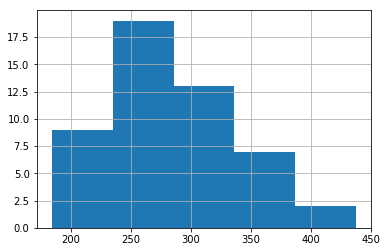

In [17]:
total_times.hist(bins=5)

### 4.2 - Analysing the rolling scores

In [18]:
rolling = scores_df.rolling(100).mean()

In [19]:
rolling_vol = scores_df.rolling(100).std()

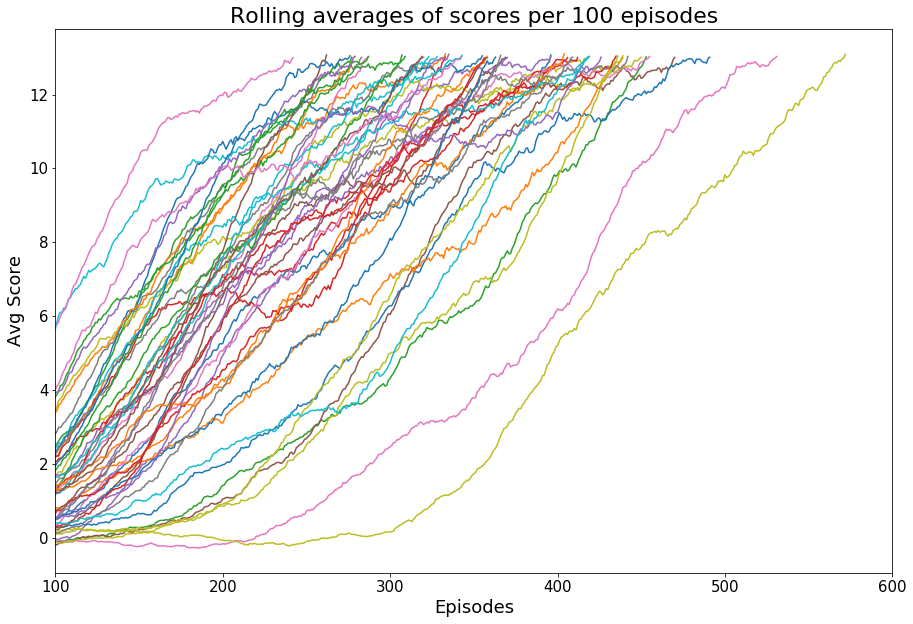

In [25]:
ax = rolling.plot(legend=None, xlim=(100,600), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=22)
ax.figure.savefig("RollAvgDoubleDQN.png")


The rolling average score has less of an s-shaped dynamics, still banded between 6 points at around 100 episodes it keeps its dispersion as learning volatility decreases after model achieves 4 points on average.

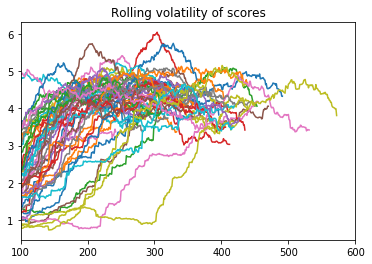

In [27]:
rolling_vol.plot(legend=None, xlim=(100,600), title="Rolling volatility of scores")

The rolling volatility of scores stays mores or less constant below 6 for most of the learning process.

### 4.3 - Analysing total number of episodes

In this section we anlyse the total number of episodes required to achieve success in the environment.

In [28]:
total_episodes = scores_df.count() - 100

In [29]:
total_episodes.describe()

count     50.000000
mean     274.560000
std       72.603806
min      143.000000
25%      221.750000
50%      265.500000
75%      325.250000
max      473.000000
dtype: float64

Both mean and median sit around **265 - 275 episodes** in line with the dqn model but standard deviation has reduced from 100 episodes to **75 episodes**.

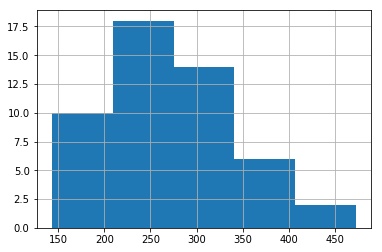

In [30]:
total_episodes.hist(bins=5)

In [31]:
total_episodes.skew()

0.3934821445639035

In [32]:
total_episodes.kurt()

-0.10439733918603888

Distribution of total number of episodes has still *positive skew* but now a significant reduction to the fatter tails with even a **negative normalised kurtosis**. 